In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Single Rotating Retarder Stokes Polarimetry
_Written by Jaren N. Ashcraft_

In optics we are frequently interested in understanding the polarization state of light. In cases where we are simply curious about the polarization of the source, we desire to measure the Stokes vector of the source. One method of realizing this in the laboratory is with the Single Rotating Retarder Stokes Polarimeter (SRRP). This consists of:

- a source with some polarization state
- a quarter-wave plate that can rotate
- a linear polarizer at a fixed angle
- a detector to measure power

We will be rotating the quarter wave plate in steps of $\delta\theta$ over a range to span the poincare sphere to sample all of the possible responses of power on our detector. To know the Stokes vector, we must take a minimum of 4 measurements to completely determine the vector. These work out analytically to be the vertices of a tetrahedron inscribed in the Poincare sphere, but to make it easier we will generalize the polarimeter to N measurements.

For each measurement, we step the QWP by some angle $\delta\theta$ and record the power on our detector. It turns out that the power we observe should follow a sinusoid of 4 frequencies*.

$$P \propto a_{0} + a_{2}sin(2\theta) + a_{4}cos(4\theta) + b_{4}cos(4\theta)$$

We simply record the power change, and use optimization to curve fit our results to $P$. The Stokes vector can be expressed in terms of these coefficients.

$$I = 2(a_{0}-a_{4})$$
$$Q = 4a_{4}$$
$$U = 4b_{4}$$
$$V = -2b_{2}$$

Here we show a demo of how to use the katsu.full_stokes_polarimetry function to reduce the data.

*depending on what you consider a frequency this could be 2-4. What I mean to say is that there are 4 terms we care about.

In [2]:
# First we begin with a simulated dataset and provide the function with a stokes vector
from katsu.polarimetry import full_stokes_polarimetry
from katsu.mueller import linear_polarizer, linear_retarder

thetas = np.linspace(0,np.pi,10)
S_to_measure = np.random.random(4)
print(S_to_measure)

[0.46539569 0.32462298 0.35508336 0.26105798]


In [3]:
S_out = full_stokes_polarimetry(thetas,Sin=S_to_measure)
print('Stokes Vector Measured')
print(S_out)
print('Percent Difference')
print(100*(S_to_measure-S_out)/S_to_measure)

Stokes Vector Measured
[0.46539569 0.32462298 0.35508336 0.26105798]
Percent Difference
[-2.38554643e-14  1.71001913e-14  1.56332731e-14 -2.12639169e-14]


Fantastic, the internal simulator appears to work. Now let's try it out with a real dataset.

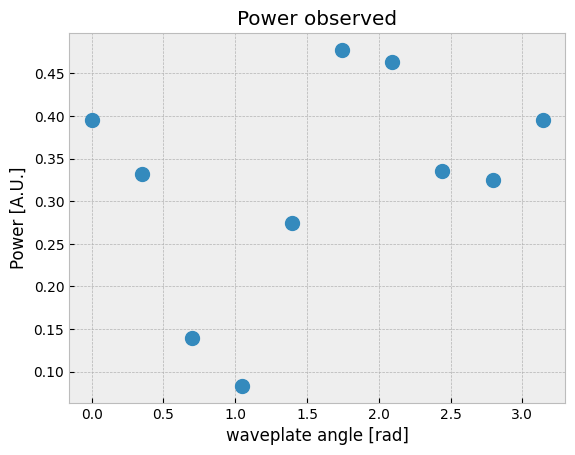

In [4]:
power_matrix = np.zeros_like(thetas)

# this is like building the W matrix
for i,angle in enumerate(thetas):
    PSA = linear_polarizer(0) @ linear_retarder(angle,np.pi/2)
    power_matrix[i] = (PSA[0,:] @ S_to_measure)

plt.style.use('bmh')
plt.figure()
plt.title('Power observed')
plt.plot(thetas, power_matrix, marker='o', linestyle='None', markersize=10)
plt.xlabel('waveplate angle [rad]')
plt.ylabel('Power [A.U.]')
plt.show()

We can next pass the power to `full_stokes_polarimetry` instead of a stokes vector to perform a real measurement!

In [5]:
S_out = full_stokes_polarimetry(thetas,power=power_matrix)
print('Stokes Vector Measured')
print(S_out)
print('Percent Difference')
print(100*(S_to_measure-S_out)/S_to_measure)

Stokes Vector Measured
[0.46539569 0.32462298 0.35508336 0.26105798]
Percent Difference
[-2.38554643e-14  1.71001913e-14  1.56332731e-14 -2.12639169e-14]
